In [0]:
import os

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [0]:
datafolder='/content/gdrive/My Drive/Cricket_Shot_Data'

In [0]:
data=os.listdir(datafolder)

In [0]:
labels=[0]*len(data)
no_of_images=len(data)
for i in range(len(data)):
  if 'Pull_Shot' in data[i]:
    labels[i]=0
  elif 'Cut_Shot' in data[i]:
    labels[i]=1
  else:
    labels[i]=2
  # print(data[i],i,labels[i])


In [0]:
import cv2

In [0]:
import numpy as np


In [9]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from keras.layers.normalization import BatchNormalization




Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
def make_model(input_shapes):
  input_tensor=tf.keras.Input(input_shapes)
  inception=tf.keras.applications.InceptionV3(
    include_top=False,
    input_tensor=input_tensor,
    input_shape=input_shapes,
    weights="imagenet",
    pooling="max",
    classifier_activation="softmax",
)
  model=tf.keras.Sequential()
  model.add(inception)
  model.add(tf.keras.layers.Dense(100, activation="relu"))
  model.add(tf.keras.layers.Dense(50, activation="relu"))
  model.add(tf.keras.layers.Dense(no_of_classes, activation="softmax"))
  
  # X=inception.output
  # X=tf.keras.layers.Flatten()(X)
  # X=tf.keras.layers.Dense(100, activation="relu")(X)
  # X=tf.keras.layers.Dense(50, activation="relu")(X)
  # predictions=tf.keras.layers.Dense(no_of_classes, activation="softmax")(X)
  # model = tf.keras.Model(inputs =  input_shape, outputs = predictions)
  model.summary()
  # model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [21]:
model = make_model(input_shapes = (128, 128, 3))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 100)               204900    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 22,012,887
Trainable params: 21,978,455
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
for layer in model.layers[:10]:
  layer.trainable=False

In [24]:
model.fit(X_train,y_train,epochs=100,batch_size=50,verbose=2,validation_split=0.2)

Epoch 1/100
9/9 - 3s - loss: 1.2471 - accuracy: 0.3814 - val_loss: 81.2784 - val_accuracy: 0.2593
Epoch 2/100
9/9 - 1s - loss: 1.1262 - accuracy: 0.4186 - val_loss: 2573.0640 - val_accuracy: 0.2593
Epoch 3/100
9/9 - 1s - loss: 0.9047 - accuracy: 0.6000 - val_loss: 2487.8308 - val_accuracy: 0.2593
Epoch 4/100
9/9 - 1s - loss: 0.7832 - accuracy: 0.6581 - val_loss: 1165.9772 - val_accuracy: 0.4630
Epoch 5/100
9/9 - 1s - loss: 0.7280 - accuracy: 0.6605 - val_loss: 3510.8264 - val_accuracy: 0.2778
Epoch 6/100
9/9 - 1s - loss: 0.6999 - accuracy: 0.6698 - val_loss: 506.2085 - val_accuracy: 0.2778
Epoch 7/100
9/9 - 1s - loss: 0.6143 - accuracy: 0.7488 - val_loss: 8823.3125 - val_accuracy: 0.2778
Epoch 8/100
9/9 - 1s - loss: 0.4930 - accuracy: 0.7674 - val_loss: 3130.5864 - val_accuracy: 0.2593
Epoch 9/100
9/9 - 1s - loss: 0.4510 - accuracy: 0.8302 - val_loss: 8988.0586 - val_accuracy: 0.4630
Epoch 10/100
9/9 - 1s - loss: 0.3385 - accuracy: 0.8791 - val_loss: 982.3629 - val_accuracy: 0.4630
Epo

In [0]:
data_images=[]
y=[]
newsize=(256,256)
for i in data[:673]:
  data_images.append(cv2.resize(cv2.imread(os.path.join('/content/gdrive/My Drive/Cricket_Shot_Data',i)),newsize,interpolation=cv2.INTER_CUBIC))
  if 'Pull_Shot' in i:
     y.append(0)
  elif 'Cut_Shot' in i:
    y.append(1)
  else:
    y.append(2)#Coverdrive
data_images=np.array(data_images)  
no_of_classes=3
data_images,y=shuffle(data_images,y)
y=tf.keras.utils.to_categorical(y, no_of_classes)
X_train,X_test,y_train,y_test=train_test_split(data_images,y,test_size=0.2,random_state=4)
X_train=X_train/255
X_test=X_test/255

In [50]:
model2 = make_model(input_shapes = (256, 256, 3))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_24 (Dense)             (None, 100)               204900    
_________________________________________________________________
dense_25 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 153       
Total params: 22,012,887
Trainable params: 21,978,455
Non-trainable params: 34,432
_________________________________________________________________


In [0]:
optimizer = keras.optimizers.Adam(lr=0.003)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
for layer in model2.layers[:10]:
  layer.trainable=False

In [0]:
callback=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=0, mode='min',
    baseline=None, restore_best_weights=False)

In [52]:
model2.fit(X_train,y_train,epochs=100,batch_size=100,verbose=2,validation_split=0.2)

Epoch 1/100
5/5 - 4s - loss: 2.4262 - accuracy: 0.3651 - val_loss: 3.8608 - val_accuracy: 0.4907
Epoch 2/100
5/5 - 2s - loss: 0.7700 - accuracy: 0.7000 - val_loss: 2.0443 - val_accuracy: 0.4815
Epoch 3/100
5/5 - 2s - loss: 0.4035 - accuracy: 0.8442 - val_loss: 1.6439 - val_accuracy: 0.3796
Epoch 4/100
5/5 - 2s - loss: 0.1252 - accuracy: 0.9581 - val_loss: 1.8441 - val_accuracy: 0.2963
Epoch 5/100
5/5 - 2s - loss: 0.1080 - accuracy: 0.9744 - val_loss: 3.3760 - val_accuracy: 0.2593
Epoch 6/100
5/5 - 2s - loss: 0.1314 - accuracy: 0.9651 - val_loss: 3.1709 - val_accuracy: 0.2778
Epoch 7/100
5/5 - 2s - loss: 0.1270 - accuracy: 0.9605 - val_loss: 1.3692 - val_accuracy: 0.3426
Epoch 8/100
5/5 - 2s - loss: 0.0443 - accuracy: 0.9791 - val_loss: 1.2908 - val_accuracy: 0.4537
Epoch 9/100
5/5 - 2s - loss: 0.0727 - accuracy: 0.9721 - val_loss: 1.5028 - val_accuracy: 0.4907
Epoch 10/100
5/5 - 2s - loss: 0.0444 - accuracy: 0.9837 - val_loss: 1.8975 - val_accuracy: 0.4444
Epoch 11/100
5/5 - 2s - loss:

In [55]:
model3 = make_model(input_shapes = (256, 256, 3))
optimizer = tf.keras.optimizers.Adam(lr=0.003)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
for layer in model3.layers[:10]:
  layer.trainable=False
model3.fit(X_train,y_train,epochs=300,batch_size=50,verbose=2,validation_split=0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_33 (Dense)             (None, 100)               204900    
_________________________________________________________________
dense_34 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 153       
Total params: 22,012,887
Trainable params: 21,978,455
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/300
5/5 - 4s - loss: 5.6293 - accuracy: 0.3628 - val_loss: 1552069120.0000 - val_accuracy: 0.4907
Epoch 2/300
5/5 - 2s - loss: 1.1597 - accuracy: 0.3814 - val_loss: 6084320296960.0000 - val_accuracy: 0.4907
Epoch 3/300
5/5 - 2

In [56]:
model4 = make_model(input_shapes = (256, 256, 3))
optimizer = tf.keras.optimizers.Adam(lr=0.007)
model4.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
for layer in model4.layers[:10]:
  layer.trainable=False
model4.fit(X_train,y_train,epochs=300,batch_size=50,verbose=2,validation_split=0.2)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_36 (Dense)             (None, 100)               204900    
_________________________________________________________________
dense_37 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 153       
Total params: 22,012,887
Trainable params: 21,978,455
Non-trainable params: 34,432
_________________________________________________________________
Epoch 1/300
9/9 - 4s - loss: 7.8171 - accuracy: 0.3837 - val_loss: 16604063635073614741504.0000 - val_accuracy: 0.4907
Epoch 2/300
9/9 - 3s - loss: 2.1387 - accuracy: 0.2977 - val_loss: 30722039331875192832.0000 - val_accuracy: 0.4907

KeyboardInterrupt: ignored

In [57]:
score2=model2.evaluate(X_test,y_test,verbose=1)

5/5 [==============================] - 1s 101ms/step - loss: 1.6105 - accuracy: 0.6889


In [58]:
score3=model3.evaluate(X_test,y_test,verbose=1)

5/5 [==============================] - 0s 46ms/step - loss: 2.9960 - accuracy: 0.4963


In [60]:
score4=model4.evaluate(X_test,y_test,verbose=1)

5/5 [==============================] - 0s 47ms/step - loss: 1.0948 - accuracy: 0.4148


In [0]:
#Model 2 has best accuracy
#Lets make a prediction using model 2


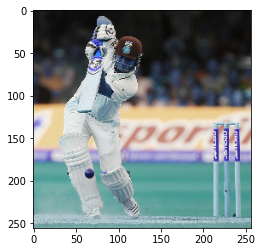

In [70]:
import matplotlib.pyplot as plt
plt.imshow(X_test[12])


In [71]:
model2.predict(np.array( [X_test[12]] ))

array([[1.0302849e-03, 5.1509653e-04, 9.9845457e-01]], dtype=float32)

In [73]:
model2.predict_classes(np.array( [X_test[12]] ))

array([2])